<a href="https://colab.research.google.com/github/juanlucasumali/KNN-from-scratch/blob/main/KNN_general_algorithm_GC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Steps:
# 1. Calculate the Euclidian distances between an instance and the k nearest instances
# 2. Order the distance values from least to greatest
# 3. Identify the first k points
# 4. Perform majority voting
# 4. Classify the given feautre as the class with the most votes

In [19]:
from matplotlib import pyplot as plt
import random

# Just one function to predict

class kNN:

    # Initializes all the attributes of the kNN class.
    def __init__(self, data_classified, data_unclassified):
        self.data_classified = data_classified
        self.data_unclassified = data_unclassified

        self.input_variables = []
        self.target_values = []

        self.distance_target_pairs = []
        self.sorted_pairs = []

        self.k_nearest_neighbors = []
        self.distances_from_unclassified = []

        self.x_values = []
        self.y_values = []

        self.predicted_class = ''
        self.kNN_mode = 0


    # Copies the classified data's input variables into a seperate array.
    def get_input_variables(self, target_value_index=-1):
      # Since datasets usually reserve the last column for labels,
      # the default value for the target value's index in a row is set to -1.
      self.input_variables = []
      self.target_values = []
      for row in self.data_classified:
        row_copy = row[:]
        target_value = row_copy.pop(target_value_index)
        self.input_variables.append(row_copy)
        self.target_values.append(target_value)

    # Creates a function to calculate the Euclidian distance between two vectors.
    def calculate_euclidian_distance(self, vector1, vector2):
      distance_squared = 0
      for vector1_element, vector2_element in zip(vector1, vector2):
        distance_squared += (vector1_element - vector2_element)**2
      distance = distance_squared**0.5
      return distance

    # Calculates the Euclidian distance between the new data point and the
    # already-classified data points.
    def find_kNN(self):

      # Appends the Euclidian distance values between the unclassified
      # and classified vectors into an array.
      for feature in self.input_variables:
        distance = self.calculate_euclidian_distance(self.data_unclassified, feature)
        self.distances_from_unclassified.append(distance)

      # Creates a list of distance-target pairs for determining which class
      # is represented the most in the top k nearest neighbors.
      self.distance_target_pairs = []
      for distance, target in zip(self.distances_from_unclassified, self.target_values):
          pair = [distance, target]
          self.distance_target_pairs.append(pair)

      # Sorts the list of distance-target pairs in descending order with
      # respect to distance.
      self.sorted_pairs = sorted(self.distance_target_pairs)


    # Predicts the classes of the unclassified data points through majority voting.
    def make_prediction(self, k=1):
      self.get_input_variables()
      self.find_kNN()

        # Appends the first k values of the sorted pairs list into another list.
      limit = 0
      for feature, target in self.sorted_pairs:
          if limit >= k:
              break
          else:
              self.k_nearest_neighbors.append(target)
              limit += 1

      # Finds the mode in the newly created list to predict the class.
      self.kNN_mode = max(set(self.k_nearest_neighbors), key = self.k_nearest_neighbors.count)
      if self.kNN_mode == 0:
        self.predicted_class = 'red'
      elif self.kNN_mode == 1.0:
        self.predicted_class = 'green'
      elif self.kNN_mode == 2.0:
        self.predicted_class = 'blue'

    # Plots the dateset with classes as different colours and the unclassified
    # datapoint as grey.
    def plot_dataset(self, feature):

      # Plots the data with respect to either the sepal dimensions or the petal
      # dimensions.
      if feature == 'sepal':
        self.plot_title = "Iris Sepal Length vs Width"
        self.x_axis = 0
        self.y_axis = 1
        self.x_label = 'Sepal Length (cm)'
        self.y_label = 'Speal Width (cm)'
      if feature == 'petal':
        self.plot_title = "Iris Petal Length vs Width"
        self.x_axis = 2
        self.y_axis = 3
        self.x_label = 'Petal Length (cm)'
        self.y_label = 'Petal Width (cm)'

      self.x_values_0 = []
      self.y_values_0 = []
      self.x_values_1 = []
      self.y_values_1 = []
      self.x_values_2 = []
      self.y_values_2 = []
      for instance in self.data_classified:
        if instance[-1] == 0:
          self.x_values_0.append(instance[self.x_axis])
          self.y_values_0.append(instance[self.y_axis])
        elif instance[-1] == 1:
          self.x_values_1.append(instance[self.x_axis])
          self.y_values_1.append(instance[self.y_axis])
        elif instance[-1] == 2:
          self.x_values_2.append(instance[self.x_axis])
          self.y_values_2.append(instance[self.y_axis])
          
      plt.scatter(self.x_values_0, self.y_values_0, c='red')
      plt.scatter(self.x_values_1, self.y_values_1, c='green')
      plt.scatter(self.x_values_2, self.y_values_2, c='blue')
      plt.scatter(self.data_unclassified[self.x_axis], self.data_unclassified[self.y_axis], c='grey')
      
      plt.xlabel(self.x_label)
      plt.ylabel(self.y_label)
      plt.title(self.plot_title)
      
      plt.show()

      self.plot_dataset_predicted()

    # Plots the dateset with the unclassified datapoint labelled as the
    # predicted class.
    def plot_dataset_predicted(self):
      plt.scatter(self.x_values_0, self.y_values_0, c='red')
      plt.scatter(self.x_values_1, self.y_values_1, c='green')
      plt.scatter(self.x_values_2, self.y_values_2, c='blue')
      plt.scatter(self.data_unclassified[self.x_axis], self.data_unclassified[3], c=self.predicted_class)
      
      plt.xlabel(self.x_label)
      plt.ylabel(self.y_label)
      plt.title(self.plot_title)
      
      plt.show()

Checking the algorithm's accuracy

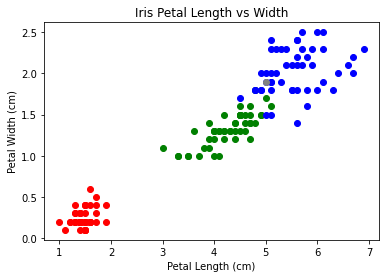

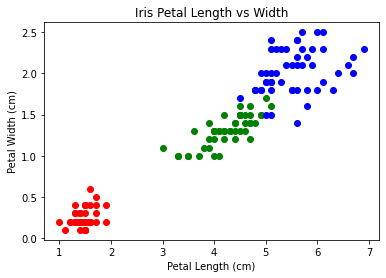

1.0

In [18]:
import pandas as pd
import numpy as np

# Loads the csv data onto a Pandas dataframe
iris_data = pd.read_csv('/content/Iris.csv.xls')

# Converts stringed target values into ints
numerify_targets = {"Species":     {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}}
iris_data = iris_data.replace(numerify_targets)

# Drops the ID feature
iris_data = iris_data.drop(columns='Id', axis=1)

# Converts pandas dataframe into list
iris_data_list = iris_data.values.tolist()

# # Test
data_classified_1 = iris_data_list
data_unclassified_1 = [6.3, 2.5, 5.0, 1.9]

# Test
dataset_1 = kNN(data_classified_1, data_unclassified_1)
dataset_1.make_prediction(5)

# PLOTTING
dataset_1.plot_dataset('petal')

# Test model accuracy
def test_model_accuracy(database_list, k):
  scores = []
  for instance in database_list:
    instance_copy = instance[:-1]
    database_1 = kNN(database_list, instance_copy)
    database_1.make_prediction(k)
    if database_1.kNN_mode == instance[-1]:
      scores.append(1)
    elif database_1.kNN_mode != instance[-1]:
      scores.append(0)
  proportion_correct = scores.count(1) / len(scores)
  return proportion_correct

def optimal_k_value(database_list):
  proportion_array = []
  k_range = range(1, 21)
  for k in k_range:
    proportion_correct = test_model_accuracy(iris_data_list, k)
    pair = [proportion_correct, k]
    proportion_array.append(pair)
  sorted_p_array = sorted(proportion_array, reverse=True)
  return sorted_p_array[0][1]

optimal_k = optimal_k_value(iris_data_list)
test_model_accuracy(iris_data_list, optimal_k)

# 1. Input database
# 2. Iterates through each instance
# 3. At each iteration, seperates the features and the targets
# 4. Applies kNN to the features, compares to targets
# 5. Returns the target and
# 2. Create a function that determines the propotion of incorrect predictions


Comparing the model with sklearn

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = iris_data.drop(columns='Species', axis=1)
Y = iris_data['Species']

X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

def optimal_k_value(X_test, X_train, Y_test, Y_train):
  proportion_array = []
  k_range = range(1, 21)
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train) # What does .fit do?
    Y_pred = knn.predict(X_test) # What does .predict do?
    pair = [metrics.accuracy_score(Y_test, Y_pred), k]
    proportion_array.append(pair)
  sorted_p_array = sorted(proportion_array, reverse=True)
  return sorted_p_array[0][1]

answer = optimal_k_value(X_test, X_train, Y_test, Y_train)
print(answer)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)

X_train_prediction = knn.predict(X_train)
training_data_accuracy = metrics.accuracy_score(X_train_prediction, Y_train)

print(training_data_accuracy)

1
1.0
